## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
import time
from time import mktime
from matplotlib import pyplot as plt
import seaborn as sns
import patsy
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm
import folium
from pandas import *
from folium.map import Icon, Marker, Popup
import pickle

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Importing my datasets

In [77]:
######## OLD DATA SET: NY_bikes = pd.read_csv("../../../Desktop/datasets/NYPD_Motor_Vehicle_Collisions.csv")
# NY_bike_count = pd.read_csv("../../../Desktop/datasets/NYC_bike_count.csv")
# NY_bike = pd.read_csv("../../../Downloads/NYPD_Motor_Vehicle_Collisions.csv")

NY_weather_2012 = pd.read_csv(
'https://www.wunderground.com/history/airport/KNYC/2012/1/1/CustomHistory.html\
?dayend=31&monthend=12&yearend=2012&req_city=&req_state=&req_statename=&reqdb.\
zip=&reqdb.magic=&reqdb.wmo=&format=1')

NY_weather_2013 = pd.read_csv(
'https://www.wunderground.com/history/airport/KNYC/2013/1/1/CustomHistory.html\
?dayend=31&monthend=12&yearend=2013&req_city=&req_state=&req_statename=&reqdb.\
zip=&reqdb.magic=&reqdb.wmo=&format=1')

NY_weather_2014 = pd.read_csv(
'https://www.wunderground.com/history/airport/KNYC/2014/1/1/CustomHistory.html\
?dayend=31&monthend=12&yearend=2014&req_city=&req_state=&req_statename=&reqdb.\
zip=&reqdb.magic=&reqdb.wmo=&format=1')

NY_weather_2015 = pd.read_csv(
'https://www.wunderground.com/history/airport/KNYC/2015/1/1/CustomHistory.html\
?dayend=31&monthend=12&yearend=2015&req_city=&req_state=&req_statename=&reqdb.\
zip=&reqdb.magic=&reqdb.wmo=&format=1')

NY_weather_2016 = pd.read_csv(
'https://www.wunderground.com/history/airport/KNYC/2016/1/1/CustomHistory.html\
?dayend=31&monthend=12&yearend=2016&req_city=&req_state=&req_statename=&reqdb.\
zip=&reqdb.magic=&reqdb.wmo=&format=1')

# borough = pd.read_csv('../../../Desktop/datasets/NY_boroughs.csv')

## Munging data

In [6]:
# # Replacing spaces(' ') in column header name with underscore('_')
# NY_bike.columns = NY_bike.columns.str.replace(' ', '_')

# ## Filling all 'NaN' values with zeros
# NY_bike.fillna(0, inplace=True)

# ## Converting the date/time columns to datetime
# NY_bike['DATE'] =pd.to_datetime(NY_bike['DATE'])

## passing the Time column through the pop function

# NY['TIME'] = pop(NY['TIME'])
# NY['TIME'] = NY['TIME'].astype(int)

# ## Sorting the dataframe by date
# NY_bike = NY_bike.sort_values(by='DATE')

# # filtering out the overall dataset so that I have data ending 12/31/2016
# NY = NY_bike[NY_bike['DATE'] < '01/01/2017']

## Munging the weather data:

# NY_weather_2012.columns = NY_weather_2012.columns.str.replace(' ', '_')
# NY_weather_2013.columns = NY_weather_2013.columns.str.replace(' ', '_')
# NY_weather_2014.columns = NY_weather_2014.columns.str.replace(' ', '_')
# NY_weather_2015.columns = NY_weather_2015.columns.str.replace(' ', '_')
# NY_weather_2016.columns = NY_weather_2016.columns.str.replace(' ', '_')

# NY_weather_2012.rename(columns={'EST': 'DATE'}, inplace=True)
# NY_weather_2013.rename(columns={'EST': 'DATE'}, inplace=True)
# NY_weather_2014.rename(columns={'EST': 'DATE'}, inplace=True)
# NY_weather_2015.rename(columns={'EST': 'DATE'}, inplace=True)
# NY_weather_2016.rename(columns={'EST': 'DATE'}, inplace=True)

# NY_weather_2012.fillna(0, inplace=True)
# NY_weather_2013.fillna(0, inplace=True)
# NY_weather_2014.fillna(0, inplace=True)
# NY_weather_2015.fillna(0, inplace=True)
# NY_weather_2016.fillna(0, inplace=True)

# NY_weather_2012['DATE'] = pd.to_datetime(NY_weather_2012['DATE'])
# NY_weather_2013['DATE'] = pd.to_datetime(NY_weather_2013['DATE'])
# NY_weather_2014['DATE'] = pd.to_datetime(NY_weather_2014['DATE'])
# NY_weather_2015['DATE'] = pd.to_datetime(NY_weather_2015['DATE'])
# NY_weather_2016['DATE'] = pd.to_datetime(NY_weather_2016['DATE'])

# Adding all the weather data together so now I have an overall weather file that spans 5 years.

# NY_weather = NY_weather_2012.append(NY_weather_2013.append(NY_weather_2014.append(NY_weather_2015.append(NY_weather_2016))))

# # joining the NY cycling and the NY weather dataframes on the date column (inner join)

# NY_merged = NY.merge(NY_weather, how='inner', on='DATE')

## sampling 5% of the total dataset to work with for now since the large set is a little unmanagemable 

# NY_merged_samp = NY_merged.sample(frac=0.05)
# NY_merged_samp.to_pickle('../../../Desktop/datasets/NY_merged_samp.pkl')
# NY_merged_samp = pd.read_pickle('../../datasets/NY_merged_samp.pkl')


In [4]:
NY_merged_samp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47739 entries, 471884 to 603118
Data columns (total 51 columns):
DATE                             47739 non-null datetime64[ns]
TIME                             47739 non-null int64
BOROUGH                          47739 non-null object
ZIP_CODE                         47739 non-null float64
LATITUDE                         47739 non-null float64
LONGITUDE                        47739 non-null float64
LOCATION                         47739 non-null object
ON_STREET_NAME                   47739 non-null object
CROSS_STREET_NAME                47739 non-null object
OFF_STREET_NAME                  47739 non-null object
NUMBER_OF_PERSONS_INJURED        47739 non-null int64
NUMBER_OF_PERSONS_KILLED         47739 non-null int64
NUMBER_OF_PEDESTRIANS_INJURED    47739 non-null int64
NUMBER_OF_PEDESTRIANS_KILLED     47739 non-null int64
NUMBER_OF_CYCLIST_INJURED        47739 non-null int64
NUMBER_OF_CYCLIST_KILLED         47739 non-null int64
N

# Functions

In [84]:
## need to remove the minutes from the time so that I have just the hour of the day for analysis

def pop(col):
    NEW_TIME = []
    for i in col:
        NEW_TIME.append(i[:-3])
    return NEW_TIME

## writing a function to separate the NY_bike dataframe into multiple segments (quarterly and yearly) so that I can do 
## some trend analysis on a much more manageable set of data

def segment_func(bike_df, start_date, end_date):
    qtr_mask = (bike_df['DATE'] >= start_date) & (bike_df['DATE'] <= end_date)
    bike_masked = bike_df[qtr_mask]
    qtr_mask2 = ((bike_masked['NUMBER_OF_CYCLIST_INJURED'] != 0) | (bike_masked['NUMBER_OF_CYCLIST_KILLED'] != 0))
    return bike_masked[qtr_mask2]

## writing a function to extract the month from the datetime objects so that I can plot each month's aggregated totals
## for each month

def month_extract(col):
    MONTH = []
    for i in col:
        MONTH.append(i.month)
    return MONTH

## writing a function to extract the hour of the day from the datetime objects ('DATE' column) so that I can plot each 
## segment's volume of injury/death per each hour and see what time of day is most dangerous.

def hour_extract(col):
    HOUR = []
    for i in col:
        HOUR.append(i.hour)
    return HOUR

## making a function that will convert the Army time hour to a standard hour of the day (example: 20 --> 8pm)

def army_convert(col):
    std_hour = []
    for i in col:
        if i == 1:
            std_hour.append('1am')
        elif i == 2:
            std_hour.append('2am')
        elif i == 3:
            std_hour.append('3am')
        elif i == 4:
            std_hour.append('4am')
        elif i == 5:
            std_hour.append('5am')
        elif i == 6:
            std_hour.append('6am')
        elif i == 7:
            std_hour.append('7am')
        elif i == 8:
            std_hour.append('8am')
        elif i == 9:
            std_hour.append('9am')
        elif i == 10:
            std_hour.append('10am')
        elif i == 11:
            std_hour.append('11am')
        elif i == 12:
            std_hour.append('12pm')
        elif i == 13:
            std_hour.append('1pm')
        elif i == 14:
            std_hour.append('2pm')
        elif i == 15:
            std_hour.append('3pm')
        elif i == 16:
            std_hour.append('4pm')
        elif i == 17:
            std_hour.append('5pm')
        elif i == 18:
            std_hour.append('6pm')
        elif i == 19:
            std_hour.append('7pm')
        elif i == 20:
            std_hour.append('8pm')
        elif i == 21:
            std_hour.append('9pm')
        elif i == 22:
            std_hour.append('10pm')
        elif i == 23:
            std_hour.append('11pm')
        elif i == 0:
            std_hour.append('12am')
        else:
            pass
    
    return std_hour
        
## making a function that creates a list containing a '1' if there was a cyclist injured/killed and a '0' if there were
## no cyclists injured/killed

def binary(col):
    CYCLISTS_INJURED = []
    for i in col:
        if i > 0:
            CYCLISTS_INJURED.append(1)
        else:
            CYCLISTS_INJURED.append(0)
    return CYCLISTS_INJURED

def weather(col):
    rain = []
    for i in col:
        if i > 0:
            rain.append(1)
        else:
            rain.append(0)
    return rain

## building a function that separates the amount of precipitation in NYC into 6 varying buckets of intensity (0:5)

def precip(col):
    precip_cat = []
    for i in col:
        if (i > 0) & (i <= 1.00):
            precip_cat.append(1)
        elif (i > 1.00) & (i <= 2.00):
            precip_cat.append(2)
        elif (i > 2.00) & (i <= 3.00):
            precip_cat.append(3)
        elif (i > 3.00) & (i <= 4.00):
            precip_cat.append(4)
        elif (i > 4.00) & (i <= 5.00):
            precip_cat.append(5)
        else:
            precip_cat.append(0)
    return precip_cat


In [86]:
## adding an hour and month column in the merged dataframe so I can see overall aggregations by hour of the day

NY_merged_samp['MONTH'] = month_extract(NY_merged_samp['DATE'])

In [87]:
## passing the Cyclist injured and Cyclist killed columns through the binary function 

CYCLISTS = binary(NY_merged_samp['NUMBER_OF_CYCLIST_INJURED'])
CYCLISTS_2 = binary(NY_merged_samp['NUMBER_OF_CYCLIST_KILLED'])
NY_merged_samp['CYCLISTS_INJURED'] = CYCLISTS
NY_merged_samp['CYCLISTS_KILLED'] = CYCLISTS_2

In [89]:
## passing the HOUR column in the dataframe through the army time converting function previously created and renaming
## the column '12hr_time'

NY_merged_samp['12hr_time'] = army_convert(NY_merged_samp['TIME'])

In [98]:
## passing the 'PrecipitationIn' column through the precipitation in function so i've got a column to separate out by
## amount of precipitation

NY_merged_samp['precip_scale'] = precip(NY_merged_samp.PrecipitationIn)

In [91]:
## sorting the sampled dataframe in ascending order by DATE

NY_merged_samp.sort_values(by='DATE', axis=0, ascending=True, inplace=True)

In [92]:
## need to convert the precipitation column to a dtype float, but before doing so I need to replace all the 'T's' with
## '0'. T stands for 'traces' of precipitation, aka not enough to warrant documenting any measurement

NY_merged_samp['PrecipitationIn'].replace(to_replace='T', value=0.00, inplace=True)
NY_merged_samp['PrecipitationIn'] = NY_merged_samp['PrecipitationIn'].astype(float)

## passing the precipitation column of the df through the weather function previously created so that I categorize the 
## column into two categories: rain vs. no rain

NY_merged_samp['RAIN'] = weather(NY_merged_samp['PrecipitationIn'])

In [93]:
## creating a DF that shows the accidents in which more than 1 cyclist was injured

cyclists_injured_over_1 = NY_merged_samp[NY_merged_samp['NUMBER_OF_CYCLIST_INJURED'] > 1]
cyclists_killed_over_1 = NY_merged_samp[NY_merged_samp['NUMBER_OF_CYCLIST_KILLED'] > 1]
print "Total accidents injuring more than 1 cyclist:"
cyclists_injured_over_1['NUMBER_OF_CYCLIST_INJURED'].sum()
print "__________________________________________________\n"

print "Total accidents killing more than 1 cyclist:"
cyclists_killed_over_1['NUMBER_OF_CYCLIST_KILLED'].sum()

Total accidents injuring more than 1 cyclist:


128

__________________________________________________

Total accidents killing more than 1 cyclist:


0

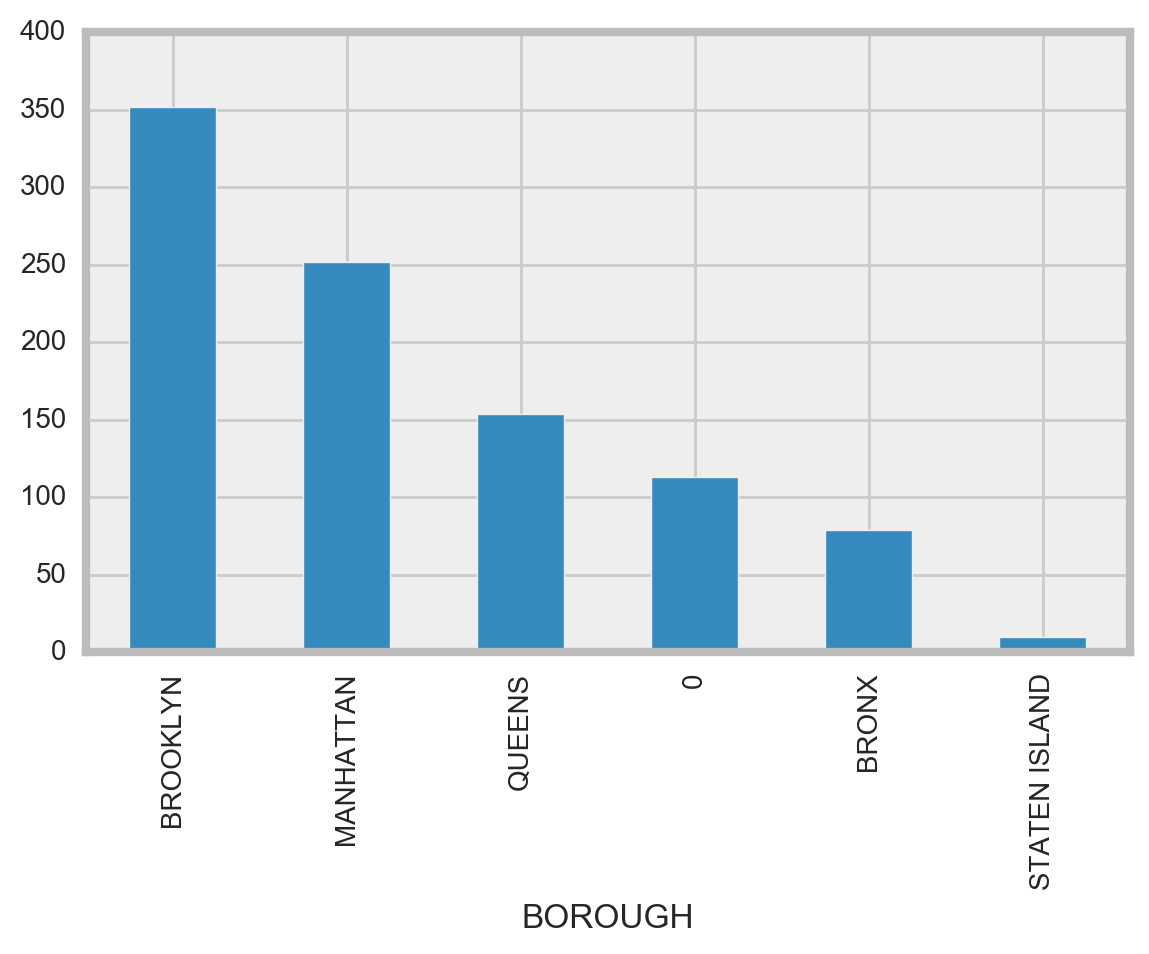

In [16]:
## plotting the amount of cyclists that are injured per borough in NYC

plt.style.use('bmh')
NY_merged_samp.groupby(['BOROUGH'])['CYCLISTS_INJURED'].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

In [6]:
## separating my dataframe into years and quarters for trend analysis (number of accidents over time) and masking those
## dataframes to only show those instances in which cyclists were injured or killed

## years

NY_2012 = segment_func(NY, '01/01/2012', '12/31/2012')
NY_2013 = segment_func(NY, '01/01/2013', '12/31/2013')
NY_2014 = segment_func(NY, '01/01/2014', '12/31/2014')
NY_2015 = segment_func(NY, '01/01/2015', '12/31/2015')
NY_2016 = segment_func(NY, '01/01/2016', '12/31/2016')

## quarters

q3_12 = segment_func(NY, '07/01/2012', '09/30/2012')
q4_12 = segment_func(NY, '10/01/2012', '12/31/2012')
q1_13 = segment_func(NY, '01/01/2013', '03/31/2013')
q2_13 = segment_func(NY, '04/01/2013', '06/30/2013')
q3_13 = segment_func(NY, '07/01/2013', '09/30/2013')
q4_13 = segment_func(NY, '10/01/2013', '12/31/2013')
q1_14 = segment_func(NY, '01/01/2014', '03/31/2014')
q2_14 = segment_func(NY, '04/01/2014', '06/30/2014')
q3_14 = segment_func(NY, '07/01/2014', '09/30/2014')
q4_14 = segment_func(NY, '10/01/2014', '12/31/2014')
q1_15 = segment_func(NY, '01/01/2015', '03/31/2015')
q2_15 = segment_func(NY, '04/01/2015', '06/30/2015')
q3_15 = segment_func(NY, '07/01/2015', '09/30/2015')
q4_15 = segment_func(NY, '10/01/2015', '12/31/2015')
q1_16 = segment_func(NY, '01/01/2016', '03/31/2016')
q2_16 = segment_func(NY, '04/01/2016', '06/30/2016')
q3_16 = segment_func(NY, '07/01/2016', '09/30/2016')
q4_16 = segment_func(NY, '10/01/2016', '12/31/2016')

In [7]:
## creating 'month' columns in the yearly and quarterly dataframes using the month extraction function previously created

## years

NY_2012['MONTH'] = month_extract(NY_2012['DATE'])
NY_2013['MONTH'] = month_extract(NY_2013['DATE'])
NY_2014['MONTH'] = month_extract(NY_2014['DATE'])
NY_2015['MONTH'] = month_extract(NY_2015['DATE'])
NY_2016['MONTH'] = month_extract(NY_2016['DATE'])

## months

q3_12['MONTH'] = month_extract(q3_12['DATE'])
q4_12['MONTH'] = month_extract(q4_12['DATE'])
q1_13['MONTH'] = month_extract(q1_13['DATE'])
q2_13['MONTH'] = month_extract(q2_13['DATE'])
q3_13['MONTH'] = month_extract(q3_13['DATE'])
q4_13['MONTH'] = month_extract(q4_13['DATE'])
q1_14['MONTH'] = month_extract(q1_14['DATE'])
q2_14['MONTH'] = month_extract(q2_14['DATE'])
q3_14['MONTH'] = month_extract(q3_14['DATE'])
q4_14['MONTH'] = month_extract(q4_14['DATE'])
q1_15['MONTH'] = month_extract(q1_15['DATE'])
q2_15['MONTH'] = month_extract(q2_15['DATE'])
q3_15['MONTH'] = month_extract(q3_15['DATE'])
q4_15['MONTH'] = month_extract(q4_15['DATE'])
q1_16['MONTH'] = month_extract(q1_16['DATE'])
q2_16['MONTH'] = month_extract(q2_16['DATE'])
q3_16['MONTH'] = month_extract(q3_16['DATE'])
q4_16['MONTH'] = month_extract(q4_16['DATE'])

In [8]:
## creating 'hour' columns in the yearly and monthly dataframes using the function previously created so that I can 
## group the data by hour of the day 

## years

NY_2012['HOUR'] = hour_extract(NY_2012['TIME'])
NY_2013['HOUR'] = hour_extract(NY_2013['TIME'])
NY_2014['HOUR'] = hour_extract(NY_2014['TIME'])
NY_2015['HOUR'] = hour_extract(NY_2015['TIME'])
NY_2016['HOUR'] = hour_extract(NY_2016['TIME'])

## months

q3_12['HOUR'] = hour_extract(q3_12['TIME'])
q4_12['HOUR'] = hour_extract(q4_12['TIME'])
q1_13['HOUR'] = hour_extract(q1_13['TIME'])
q2_13['HOUR'] = hour_extract(q2_13['TIME'])
q3_13['HOUR'] = hour_extract(q3_13['TIME'])
q4_13['HOUR'] = hour_extract(q4_13['TIME'])
q1_14['HOUR'] = hour_extract(q1_14['TIME'])
q2_14['HOUR'] = hour_extract(q2_14['TIME'])
q3_14['HOUR'] = hour_extract(q3_14['TIME'])
q4_14['HOUR'] = hour_extract(q4_14['TIME'])
q1_15['HOUR'] = hour_extract(q1_15['TIME'])
q2_15['HOUR'] = hour_extract(q2_15['TIME'])
q3_15['HOUR'] = hour_extract(q3_15['TIME'])
q4_15['HOUR'] = hour_extract(q4_15['TIME'])
q1_16['HOUR'] = hour_extract(q1_16['TIME'])
q2_16['HOUR'] = hour_extract(q2_16['TIME'])
q3_16['HOUR'] = hour_extract(q3_16['TIME'])
q4_16['HOUR'] = hour_extract(q4_16['TIME'])

In [9]:
# q3_2012.index = q3_2012.DATE

# ## Aggregating the 2012 dataframe by month to show totals for each month I have data for in 2012.

# q3_2012_ = q3_2012.resample("M", how='sum')
# q3_2012_['DATE'] = q3_2012_.index

# ax = q3_2012_.plot(x='DATE', y='NUMBER_OF_CYCLIST_INJURED', colormap='cubehelix', kind='bar', title='Cyclists injured in 2012')
# ax = q3_2012_.plot(x='DATE', y='NUMBER_OF_CYCLIST_KILLED', color='red', kind='bar', title='Cyclists killed in 2012', ax=ax)
# plt.show()

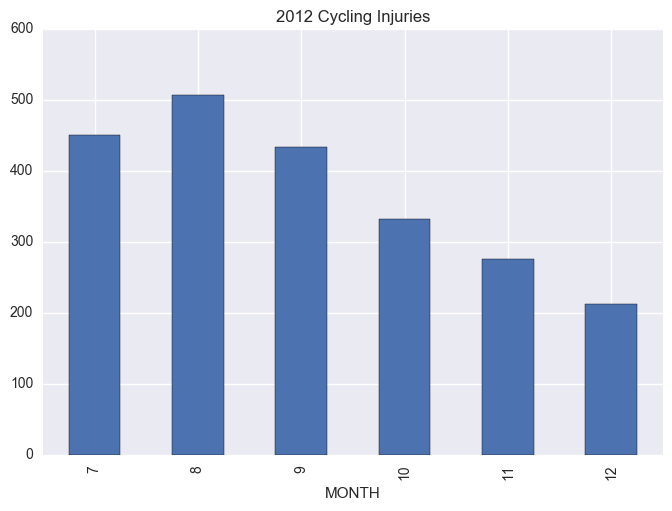

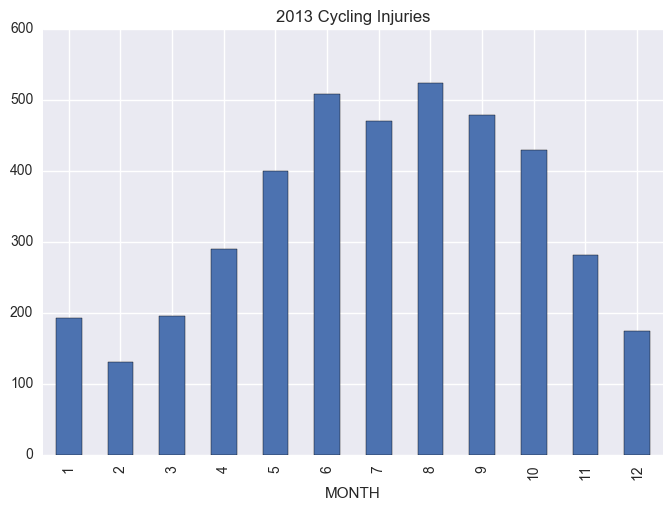

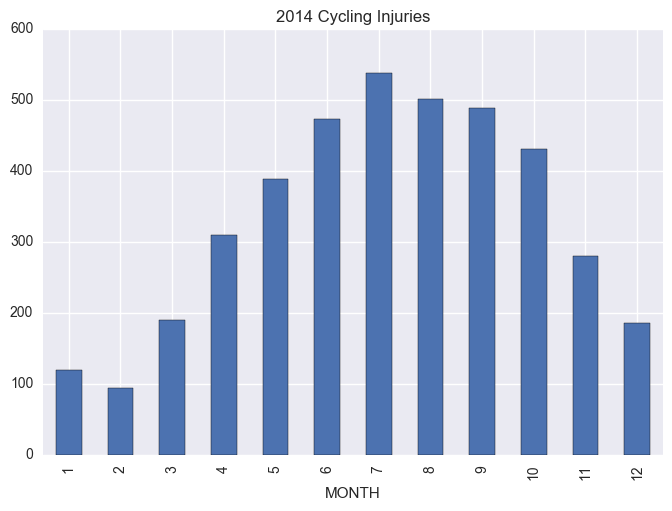

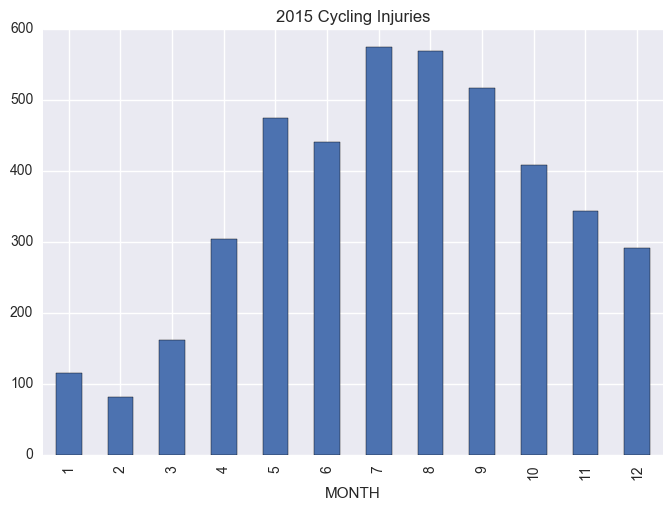

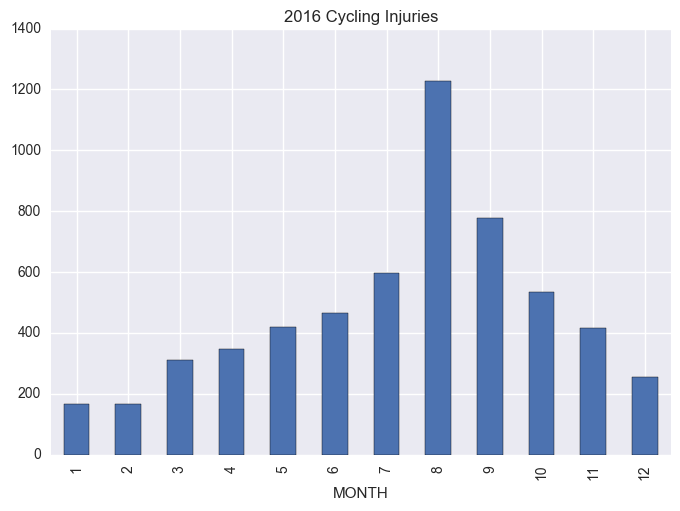

In [11]:
## plotting the total number of CYCLING INJURIES per month for each of the five years I have data for.
## Interesting initial observation - July/August are consistently the two most dangerous months in terms of sheer 
## number of accidents that occur on the road

NY_2012.groupby(['MONTH'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(title='2012 Cycling Injuries', kind='bar')
plt.show()
NY_2013.groupby(['MONTH'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(title='2013 Cycling Injuries', kind='bar')
plt.show()
NY_2014.groupby(['MONTH'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(title='2014 Cycling Injuries', kind='bar')
plt.show()
NY_2015.groupby(['MONTH'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(title='2015 Cycling Injuries', kind='bar')
plt.show()
NY_2016.groupby(['MONTH'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(title='2016 Cycling Injuries', kind='bar')
plt.show()


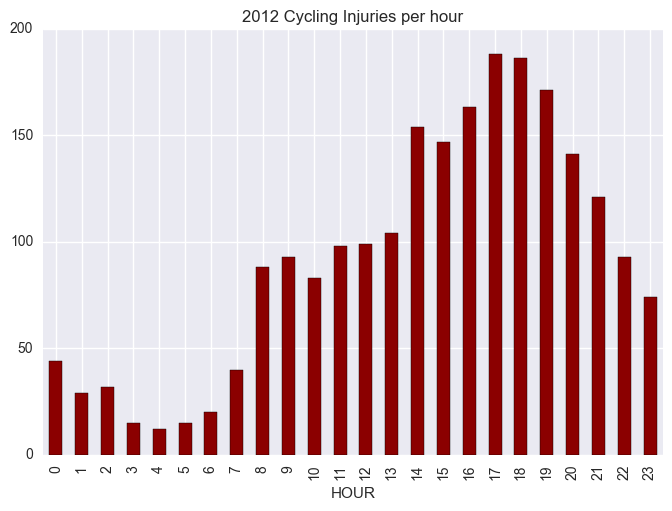

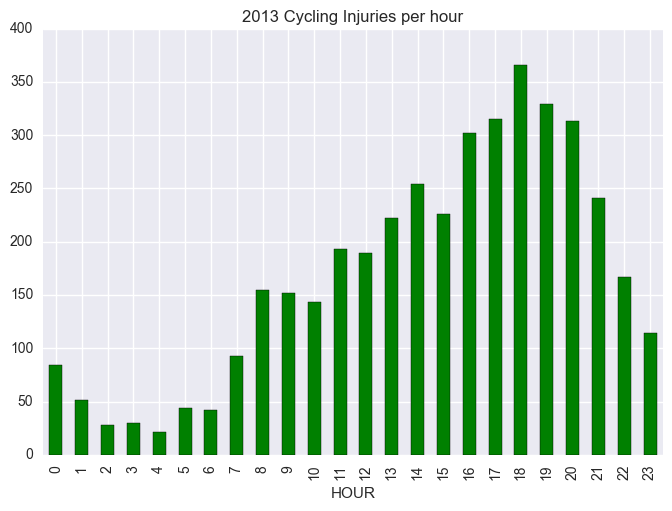

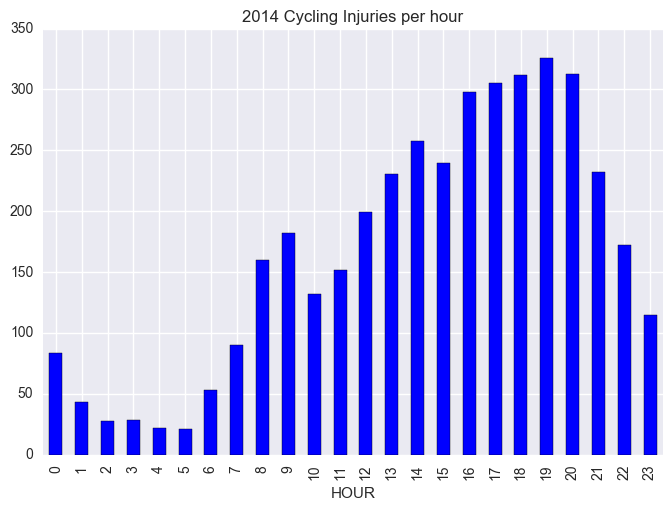

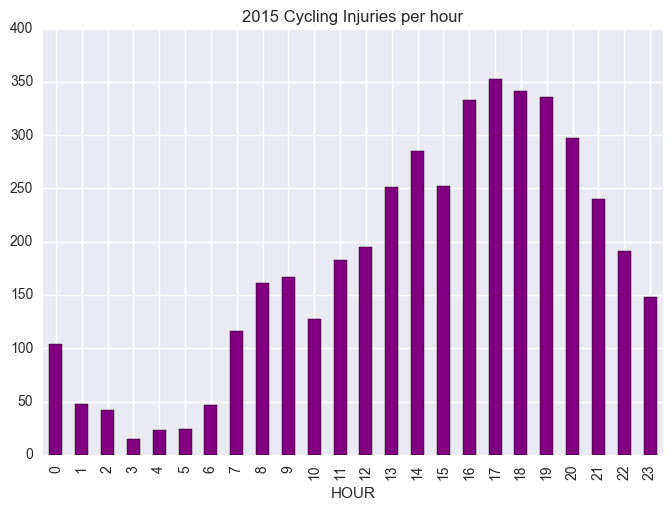

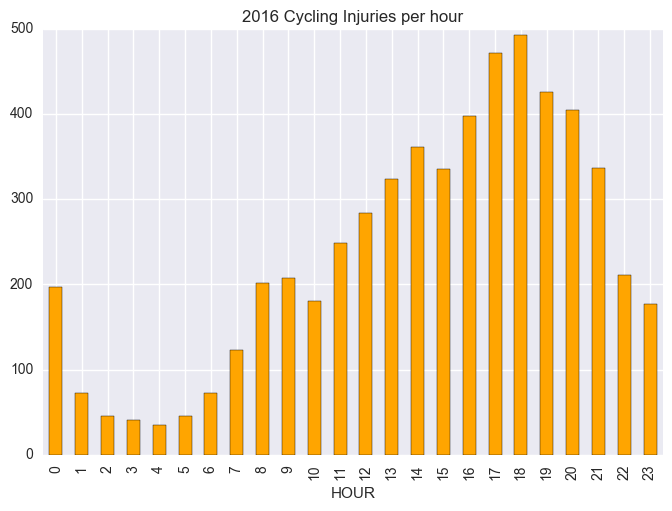

In [12]:
## plotting the amount of cycling injuries per hour for each of the 5 years

NY_2012.groupby(['HOUR'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(title='2012 Cycling Injuries per hour', kind='bar', color='darkred')
plt.show()
NY_2013.groupby(['HOUR'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(title='2013 Cycling Injuries per hour', kind='bar', color='green')
plt.show()
NY_2014.groupby(['HOUR'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(title='2014 Cycling Injuries per hour', kind='bar', color='blue')
plt.show()
NY_2015.groupby(['HOUR'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(title='2015 Cycling Injuries per hour', kind='bar', color='purple')
plt.show()
NY_2016.groupby(['HOUR'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(title='2016 Cycling Injuries per hour', kind='bar', color='orange')
plt.show()

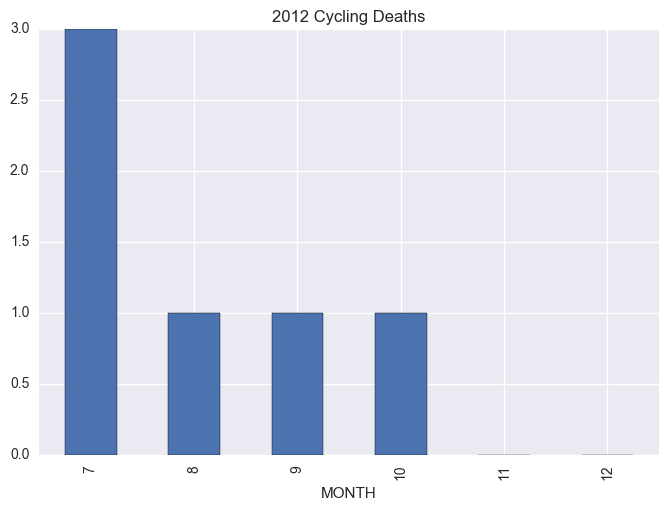

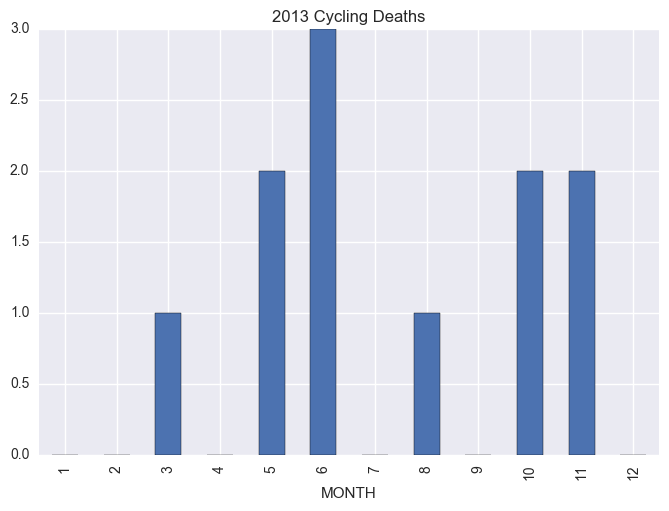

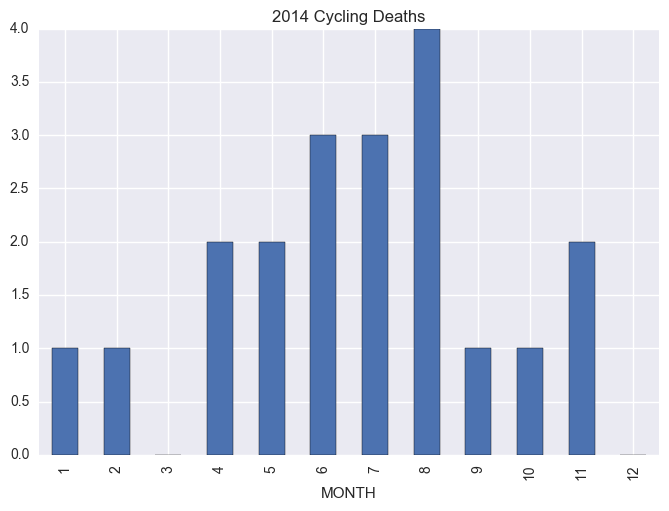

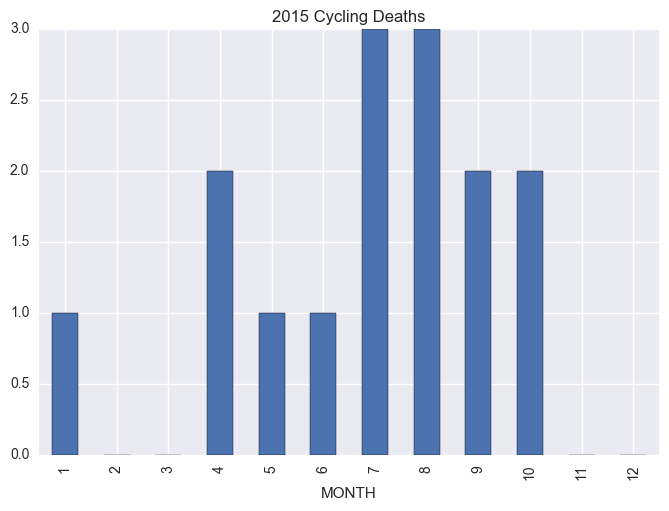

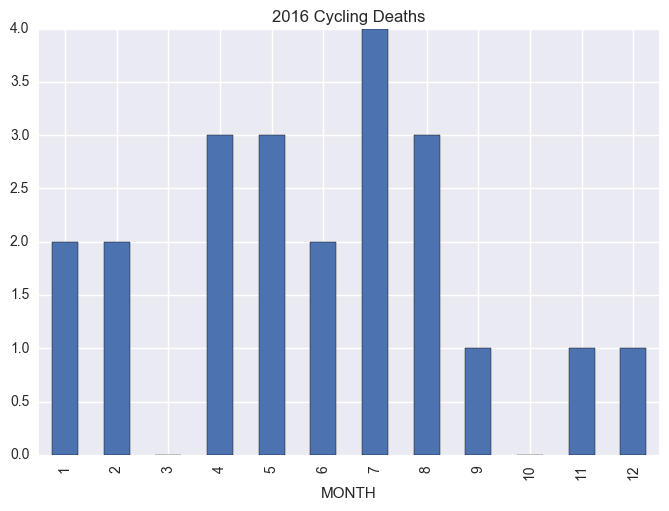

In [13]:
## similar results as above for cycling deaths across the 12 months in the year

NY_2012.groupby(['MONTH'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(title='2012 Cycling Deaths', kind='bar')
plt.show()
NY_2013.groupby(['MONTH'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(title='2013 Cycling Deaths', kind='bar')
plt.show()
NY_2014.groupby(['MONTH'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(title='2014 Cycling Deaths', kind='bar')
plt.show()
NY_2015.groupby(['MONTH'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(title='2015 Cycling Deaths', kind='bar')
plt.show()
NY_2016.groupby(['MONTH'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(title='2016 Cycling Deaths', kind='bar')
plt.show()

In [7]:
NY_overall = NY_2012.append(NY_2013.append(NY_2014.append(NY_2015.append(NY_2016))))

NameError: name 'NY_2012' is not defined

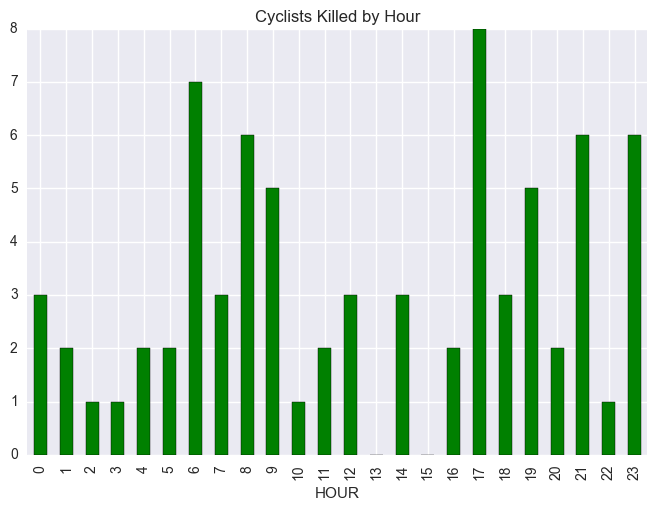

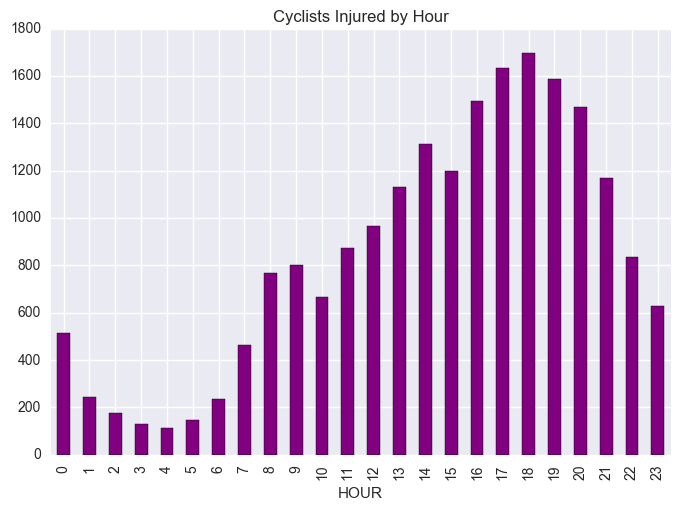

In [15]:
NY_overall.groupby(['HOUR'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(kind='bar', title='Cyclists Killed by Hour', color='green')
plt.show()
NY_overall.groupby(['HOUR'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(kind='bar', title='Cyclists Injured by Hour', color='purple')
plt.show()

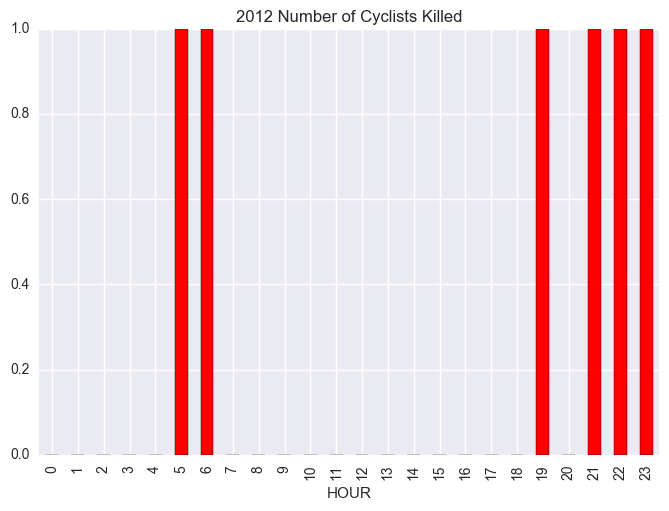

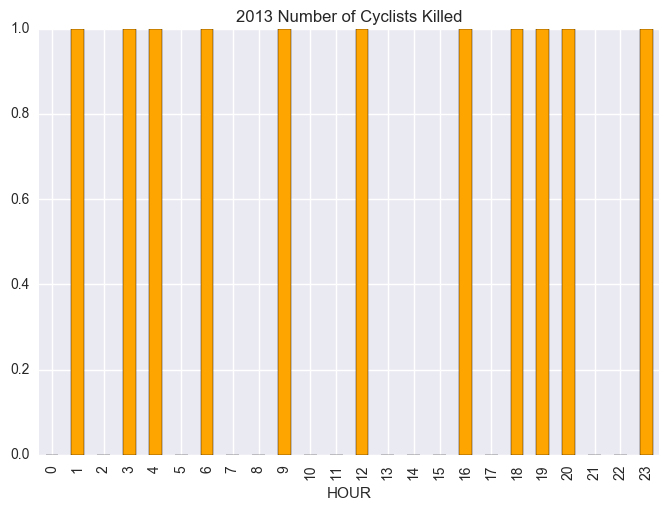

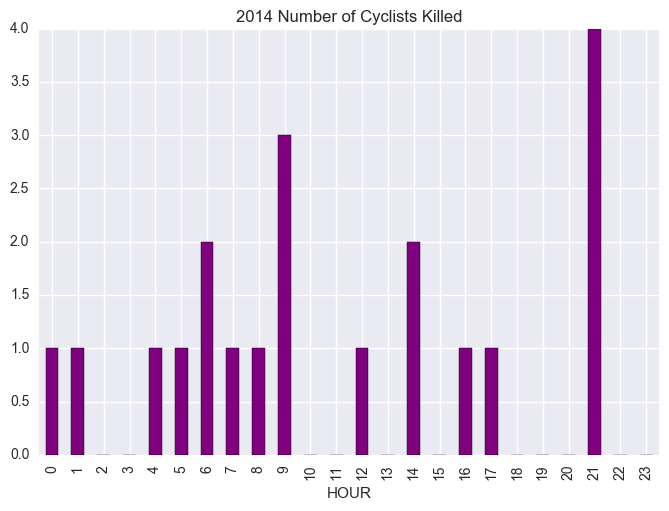

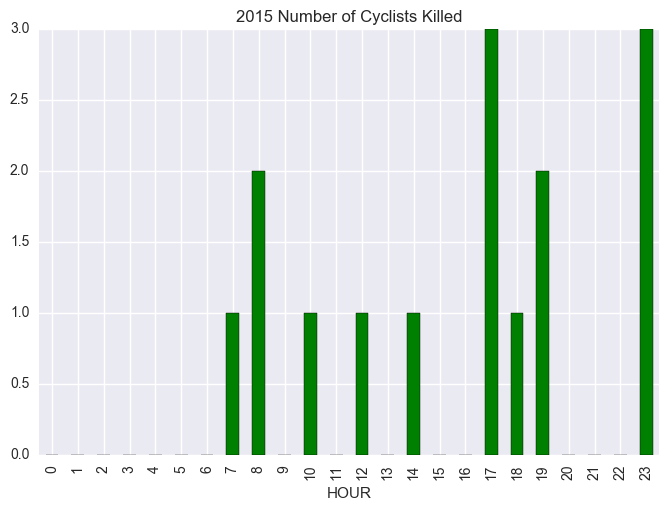

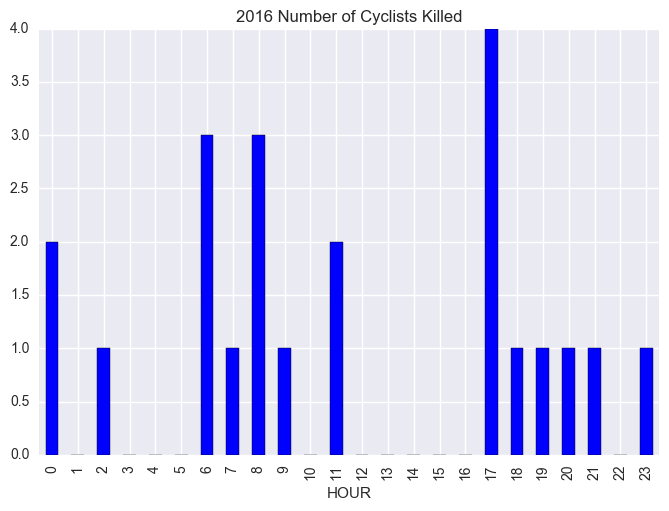

In [16]:
NY_2012.groupby(['HOUR'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(title='2012 Number of Cyclists Killed', kind='bar', color='red')
plt.show()
NY_2013.groupby(['HOUR'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(title='2013 Number of Cyclists Killed', kind='bar', color='orange')
plt.show()
NY_2014.groupby(['HOUR'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(title='2014 Number of Cyclists Killed', kind='bar', color='purple')
plt.show()
NY_2015.groupby(['HOUR'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(title='2015 Number of Cyclists Killed', kind='bar', color='green')
plt.show()
NY_2016.groupby(['HOUR'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(title='2016 Number of Cyclists Killed', kind='bar', color='blue')
plt.show()

In [17]:
NY['MONTH'] = month_extract(NY['DATE'])

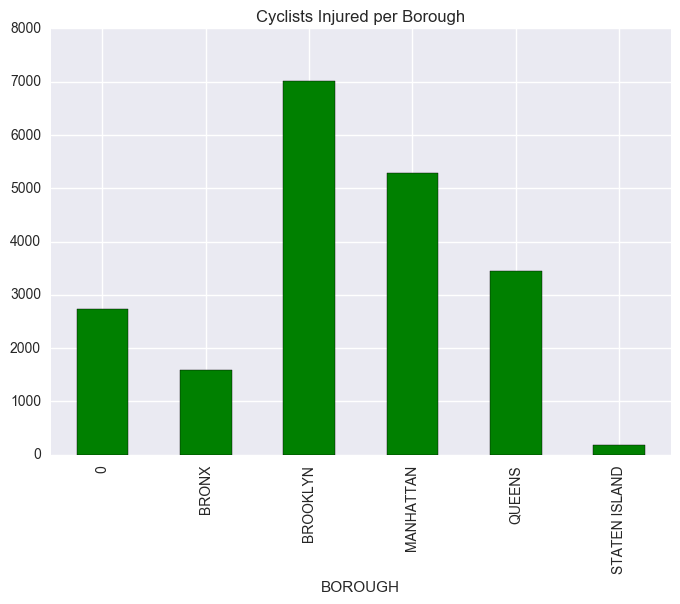

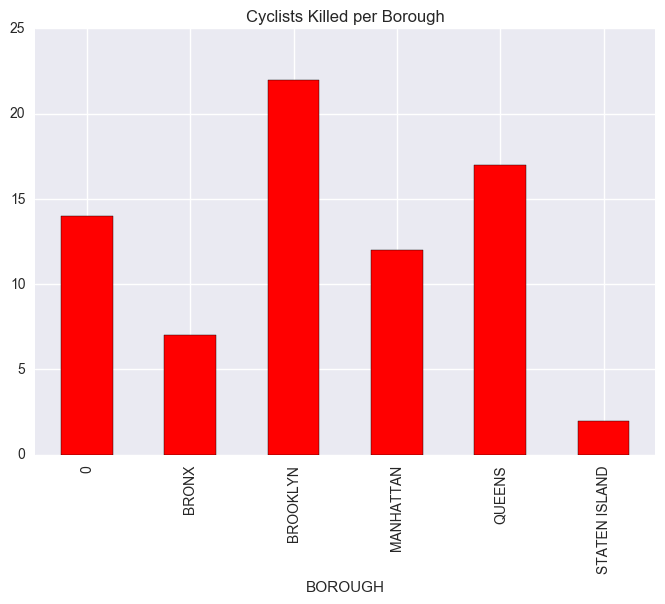

In [19]:
## plotted the cyclists injured and killed by NYC borough. The most dangerous out of all 5 major boroughs is Brooklyn.

NY_overall.groupby(['BOROUGH'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(kind='bar', color='green', title='Cyclists Injured per Borough')
plt.show()
NY_overall.groupby(['BOROUGH'])['NUMBER_OF_CYCLIST_KILLED'].sum().plot(kind='bar', color='red', title='Cyclists Killed per Borough')
plt.show()

# Beginning to fit my model

In [159]:
NY_merged_samp['precip_scale'].unique()

array([0, 1, 2, 4, 5, 3])

In [ ]:
NY_merged_samp['CYCLISTS_INJURED'].astype(float, inplace=True)

In [170]:
NY_merged_samp['precip_scale'].unique()

array([0, 1, 2, 4, 5, 3])

In [178]:
## setting up the odds ratios for injury vs. no injury given the precipitation level (0:5 scale)

y_p0 = NY_merged_samp[NY_merged_samp['precip_scale'] == 0].CYCLISTS_INJURED.values
y_p1 = NY_merged_samp[NY_merged_samp['precip_scale'] == 1].CYCLISTS_INJURED.values
y_p2 = NY_merged_samp[NY_merged_samp['precip_scale'] == 2].CYCLISTS_INJURED.values
y_p3 = NY_merged_samp[NY_merged_samp['precip_scale'] == 3].CYCLISTS_INJURED.values
y_p4 = NY_merged_samp[NY_merged_samp['precip_scale'] == 4].CYCLISTS_INJURED.values
y_p5 = NY_merged_samp[NY_merged_samp['precip_scale'] == 5].CYCLISTS_INJURED.values

print 'P(injury | precipitation scale = 0):', np.mean(y_p0)
print 'P(injury | precipitation scale = 1):', np.mean(y_p1)
print 'P(injury | precipitation scale = 2):', np.mean(y_p2)
print 'P(injury | precipitation scale = 3):', np.mean(y_p3)
print 'P(injury | precipitation scale = 4):', np.mean(y_p4)
print 'P(injury | precipitation scale = 5):', np.mean(y_p5)

P(injury | precipitation scale = 0): 0.0207618928861
P(injury | precipitation scale = 1): 0.0189604210223
P(injury | precipitation scale = 2): 0.0193298969072
P(injury | precipitation scale = 3): 0.0
P(injury | precipitation scale = 4): 0.0
P(injury | precipitation scale = 5): 0.0147058823529


In [192]:
def odds_ratio(p):
    return (float(p) / (1 - p))

In [193]:
print 'P(injury | precipitation scale = 0):', odds_ratio(np.mean(y_p0))
print 'P(injury | precipitation scale = 1):', odds_ratio(np.mean(y_p1))
print 'P(injury | precipitation scale = 2):', odds_ratio(np.mean(y_p2))
print 'P(injury | precipitation scale = 3):', odds_ratio(np.mean(y_p3))
print 'P(injury | precipitation scale = 4):', odds_ratio(np.mean(y_p4))
print 'P(injury | precipitation scale = 5):', odds_ratio(np.mean(y_p5))

P(injury | precipitation scale = 0): 0.0212020883739
P(injury | precipitation scale = 1): 0.0193268665491
P(injury | precipitation scale = 2): 0.0197109067017
P(injury | precipitation scale = 3): 0.0
P(injury | precipitation scale = 4): 0.0
P(injury | precipitation scale = 5): 0.0149253731343


In [321]:
NY_merged_samp

,DATE,TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,_Events,_WindDirDegrees<br_/>,CYCLISTS_INJURED,CYCLISTS_KILLED,HOUR,MONTH,12hr_time,RAIN,precip_scale,borough_cat
103,2012-07-01,2017-01-24 16:10:00,MANHATTAN,10065.0,40.765614,-73.960691,"(40.7656139, -73.9606907)",2 AVENUE,EAST 67 STREET,0,...,0,276<br />,0,0,16,7,4pm,0,0,2
190,2012-07-01,2017-01-24 13:15:00,MANHATTAN,10022.0,40.758976,-73.964503,"(40.7589756, -73.9645027)",EAST 57 STREET,QUEENSBORO BRIDGE APPROACH,0,...,0,276<br />,0,0,13,7,1pm,0,0,2
36,2012-07-01,2017-01-24 01:53:00,QUEENS,11412.0,40.701742,-73.765441,"(40.7017418, -73.7654408)",FARMERS BOULEVARD,111 AVENUE,0,...,0,276<br />,0,0,1,7,1am,0,0,3
322,2012-07-01,2017-01-24 14:30:00,BROOKLYN,11238.0,40.670658,-73.957975,"(40.670658, -73.9579745)",EASTERN PARKWAY,FRANKLIN AVENUE,0,...,0,276<br />,0,0,14,7,2pm,0,0,1
239,2012-07-01,2017-01-24 11:05:00,QUEENS,11374.0,40.732303,-73.858266,"(40.7323028, -73.8582662)",98 PLACE,63 ROAD,0,...,0,276<br />,0,0,11,7,11am,0,0,3
308,2012-07-01,2017-01-24 15:15:00,QUEENS,11419.0,40.682171,-73.831036,"(40.6821713, -73.8310359)",110 STREET,107 AVENUE,0,...,0,276<br />,0,0,15,7,3pm,0,0,3
97,2012-07-01,2017-01-24 02:45:00,BROOKLYN,11226.0,40.643185,-73.949729,"(40.6431849, -73.9497292)",EAST 29 STREET,CLARENDON ROAD,0,...,0,276<br />,0,0,2,7,2am,0,0,1
494,2012-07-01,2017-01-24 08:15:00,QUEENS,11373.0,40.739979,-73.877108,"(40.7399795, -73.8771085)",87 STREET,CORONA AVENUE,0,...,0,276<br />,0,0,8,7,8am,0,0,3
140,2012-07-01,2017-01-24 21:31:00,MANHATTAN,10036.0,40.763115,-73.999650,"(40.7631147, -73.9996498)",WEST SIDE HIGHWAY,WEST 44 STREET,0,...,0,276<br />,0,0,21,7,9pm,0,0,2
460,2012-07-01,2017-01-24 08:34:00,BROOKLYN,11213.0,40.668798,-73.931120,"(40.6687978, -73.9311201)",EASTERN PARKWAY,UTICA AVENUE,0,...,0,276<br />,0,0,8,7,8am,0,0,1


In [181]:
NY_merged_samp['BOROUGH'].unique()

array(['MANHATTAN', 'QUEENS', 'BROOKLYN', 0, 'BRONX', 'STATEN ISLAND'], dtype=object)

In [102]:
## building a function that categorizes the different boroughs in NYC as numerical values

def borough(col):
    borough_cat = []
    for i in col:
        if i == 'BROOKLYN':
            borough_cat.append(1)
        elif i == 'MANHATTAN':
            borough_cat.append(2)
        elif i == 'QUEENS':
            borough_cat.append(3)
        elif i == 'BRONX':
            borough_cat.append(4)
        elif i == 'STATEN ISLAND':
            borough_cat.append(5)
        else:
            borough_cat.append(0)
    return borough_cat


NY_merged_samp['borough_cat'] = borough(NY_merged_samp['BOROUGH'])

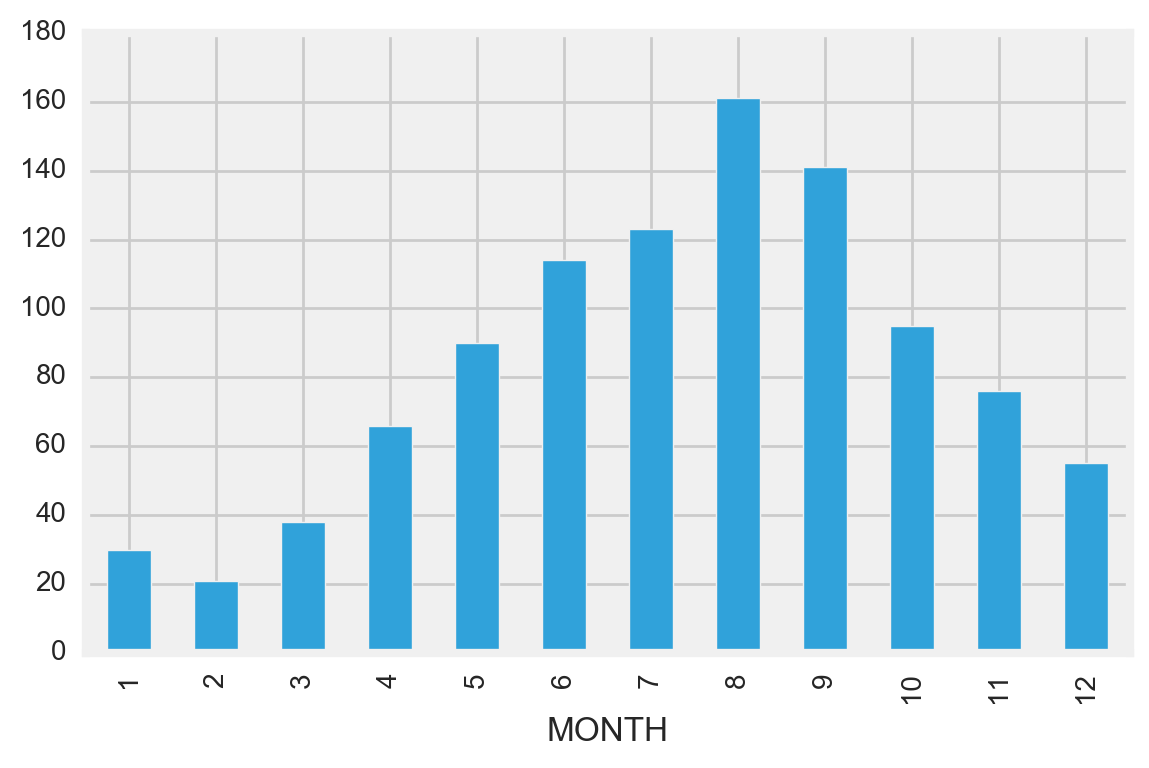

In [308]:
NY_merged_samp.groupby(['MONTH'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(kind='bar')

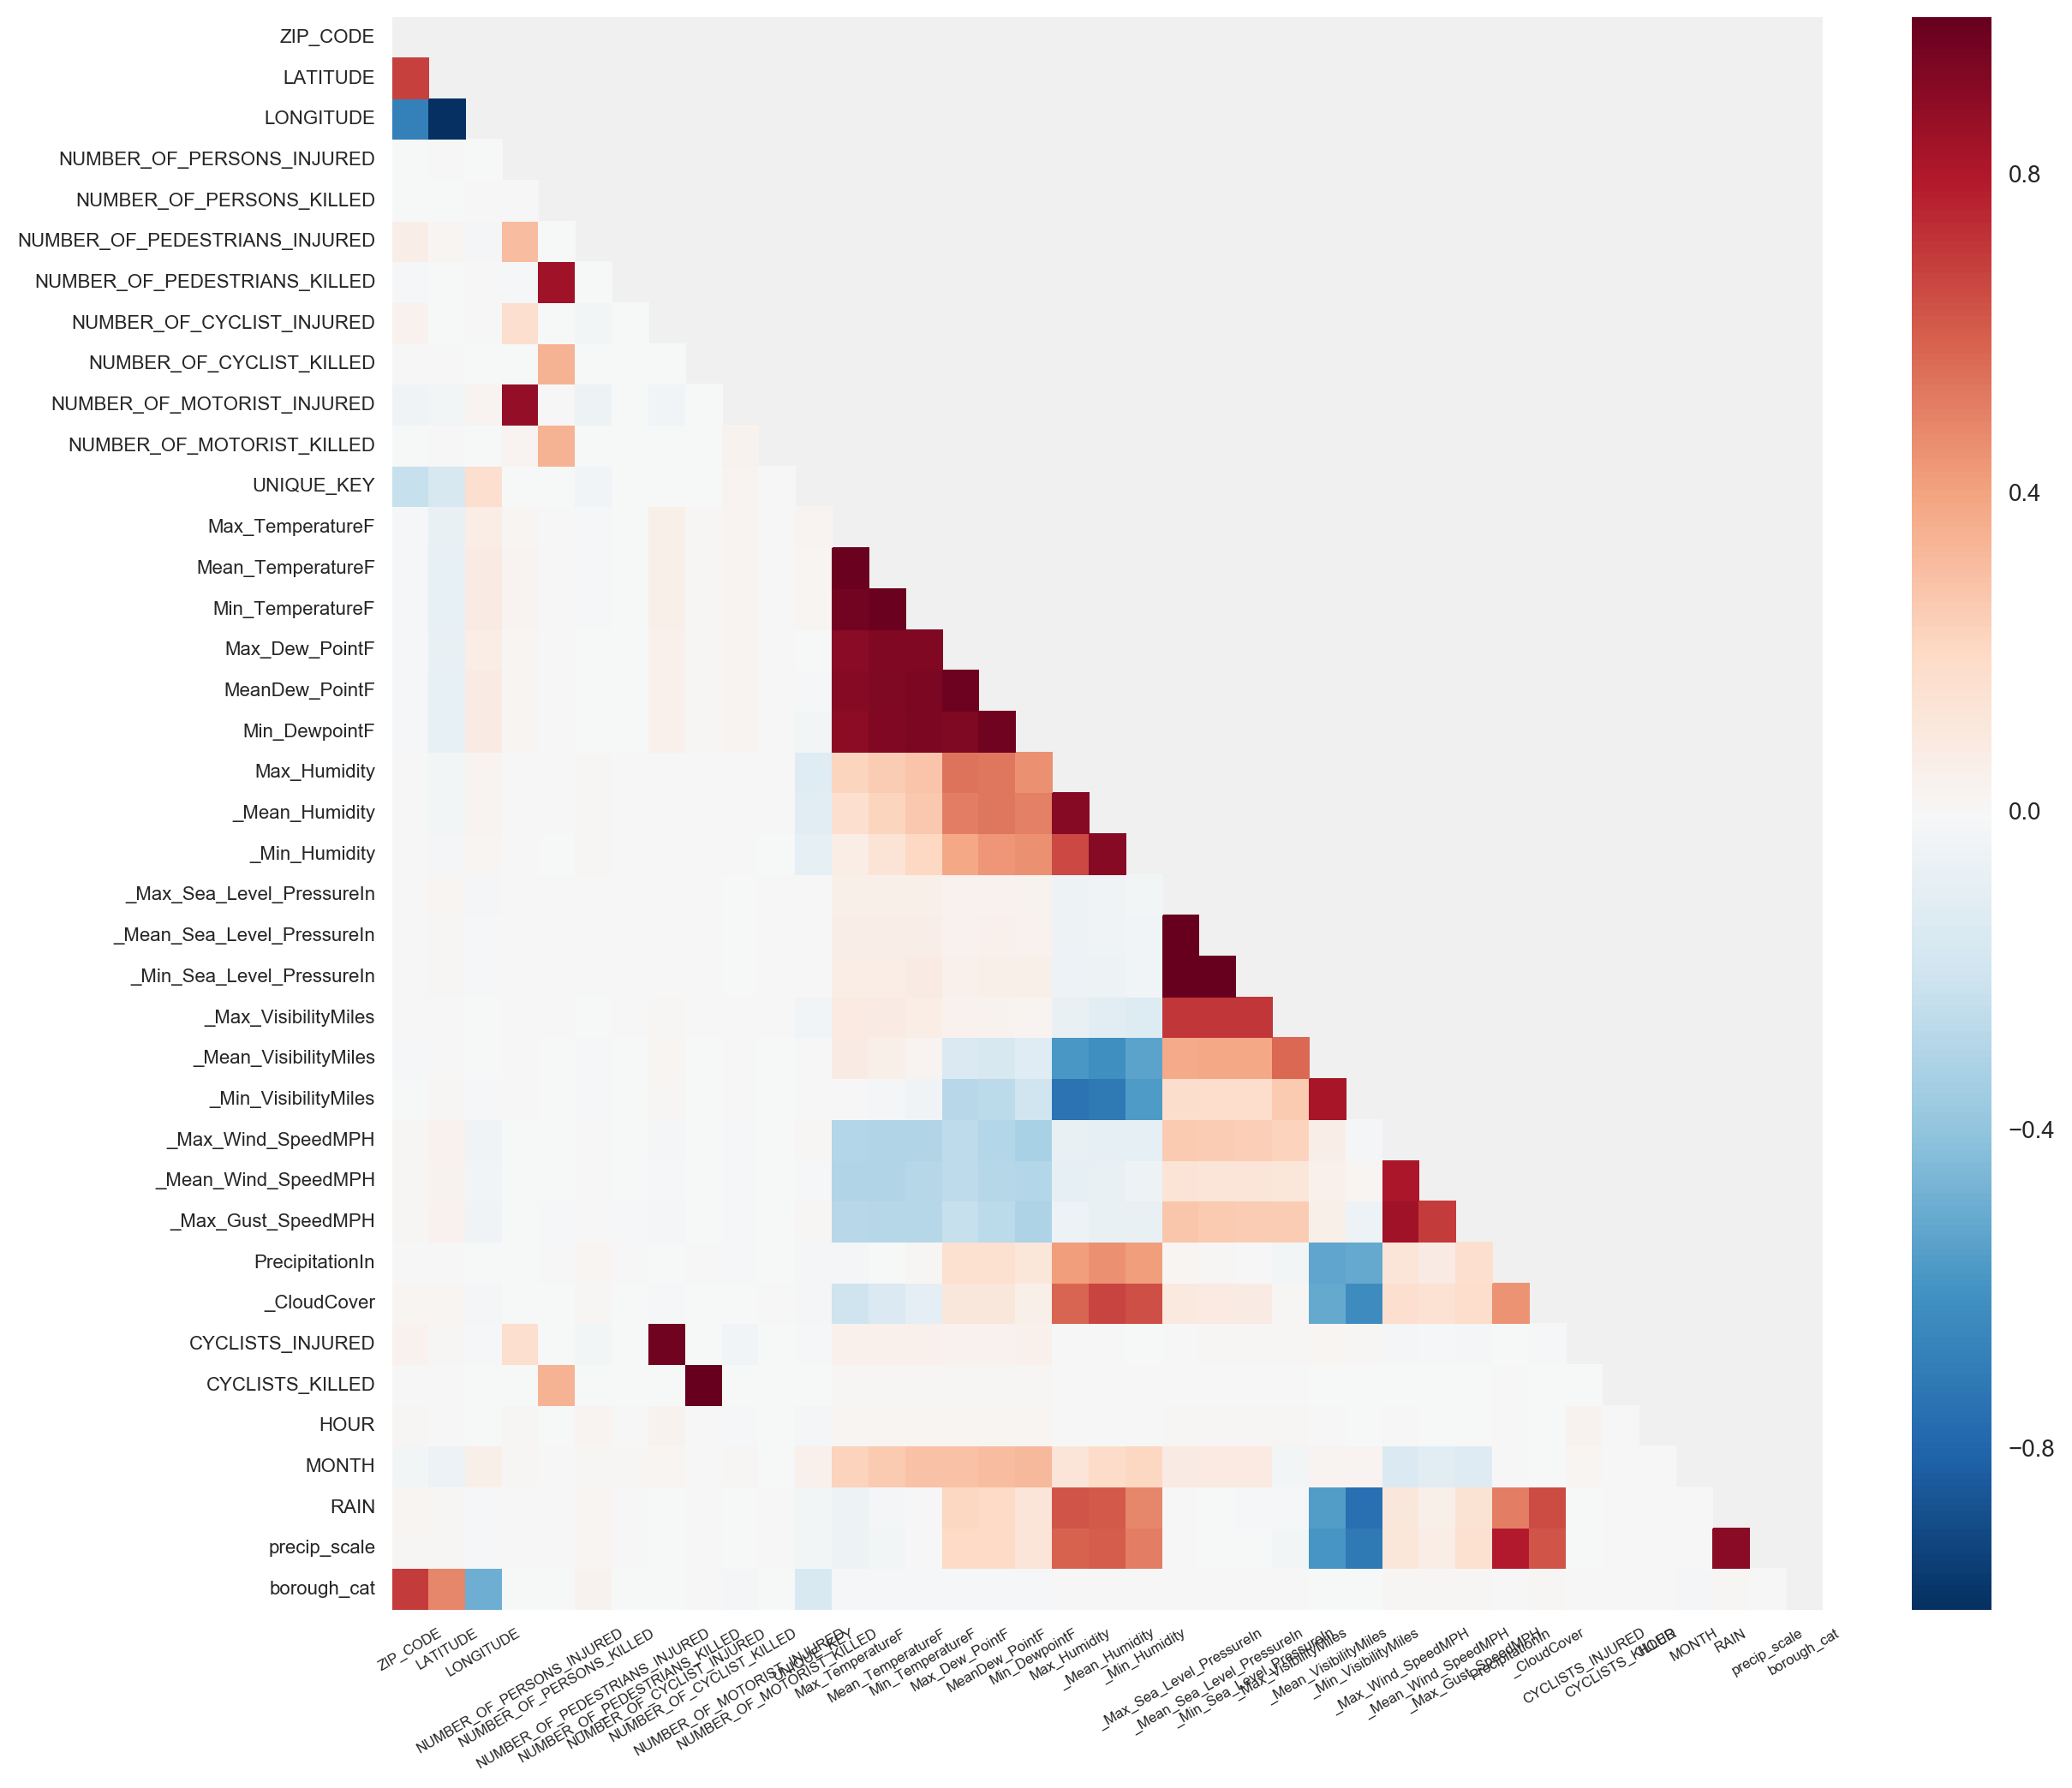

In [208]:
def correlation_heat_map(df):
    corrs = df.corr()
    fig, ax = plt.subplots(figsize=(12,12))
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(corrs, mask=mask, annot=False)
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=6, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=8, rotation=0)
    plt.show()
    
correlation_heat_map(NY_merged_samp)

In [106]:
import itertools
def expandgrid(*itrs):
    product = list(itertools.product(*itrs))
    return {'Var{}'.format(i+1):[x[i] for x in product] for i in range(len(itrs))}

months = NY_merged_samp.MONTH.unique()
pre_scale = NY_merged_samp['precip_scale'].unique()
borough = NY_merged_samp['borough_cat'].unique()
hour = NY_merged_samp.TIME.unique()

grid = expandgrid(months, pre_scale, borough, hour)
grid = pd.DataFrame(grid)
grid.columns = ['months','precip','borough','hour']

grid['bike_injuries'] = 0.

for m in months:
    NY_1 = NY_merged_samp[(NY_merged_samp['MONTH'] == m) & (NY_merged_samp['CYCLISTS_INJURED'] > 0)]
    for p in pre_scale:
        print m, p
        NY_2 = NY_1[NY_1['precip_scale'] == p]
        for b in borough:
            NY_3 = NY_2[NY_2['borough_cat'] == b]
            for h in hour:
                ny_mask = (NY_3['TIME'] == h)
                
                grid_mask = (grid.months == m) & (grid.precip == p) & (grid.borough == b) & (grid.hour == h)
                
                injuries = NY_3.loc[ny_mask, 'CYCLISTS_INJURED'].sum()
                grid.loc[grid_mask, 'bike_injuries'] = injuries


7 0
7 1
7 2
7 4
7 5
7 3
8 0
8 1
8 2
8 4
8 5
8 3
9 0
9 1
9 2
9 4
9 5
9 3
10 0
10 1
10 2
10 4
10 5
10 3
11 0
11 1
11 2
11 4
11 5
11 3
12 0
12 1
12 2
12 4
12 5
12 3
1 0
1 1
1 2
1 4
1 5
1 3
2 0
2 1
2 2
2 4
2 5
2 3
3 0
3 1
3 2
3 4
3 5
3 3
4 0
4 1
4 2
4 4
4 5
4 3
5 0
5 1
5 2
5 4
5 5
5 3
6 0
6 1
6 2
6 4
6 5
6 3


In [107]:
grid.shape

(10368, 5)

In [108]:
grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10368 entries, 0 to 10367
Data columns (total 5 columns):
months           10368 non-null int64
precip           10368 non-null int64
borough          10368 non-null int64
hour             10368 non-null int64
bike_injuries    10368 non-null float64
dtypes: float64(1), int64(4)
memory usage: 405.1 KB


In [110]:
grid.head()

,months,precip,borough,hour,bike_injuries
0,7,0,0,12,1.0
1,7,0,0,1,1.0
2,7,0,0,15,0.0
3,7,0,0,20,1.0
4,7,0,0,6,0.0


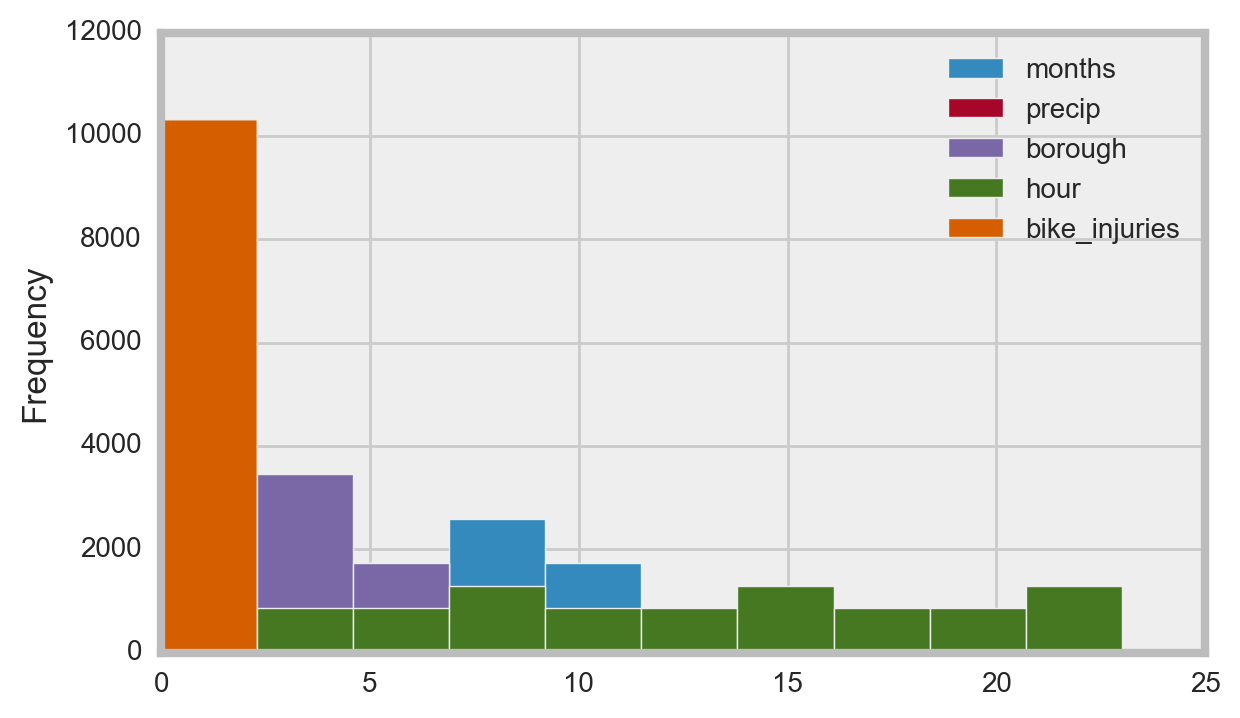

In [109]:
grid.plot(kind='hist')

In [27]:
import plotly.plotly as py

In [28]:
py.sign_in('seporter11', '5Or0w8x4EfIZIZIiPRQI')

In [29]:
q3_12['LATITUDE'][0:1]

824134    40.724285
Name: LATITUDE, dtype: float64

In [111]:
# map_1 = folium.Map(location=[40.6347476, -74.1122528],
#                    tiles = 'Stamen Terrain',
#                    zoom_start=10)

# # for i in range(len(q3_12['LATITUDE'])):
# #     folium.Marker((q3_12['LATITUDE'][i:i+1], q3_12['LONGITUDE'][i:i+1]), icon=folium.Icon(icon='cloud')).add_to(map_1)

# folium.Marker((40.6347476, -74.1122528) ,icon=folium.Icon(icon='cloud')).add_to(map_1)
# folium.Marker((40.8063462, -73.9331715) ,icon=folium.Icon(icon='cloud')).add_to(map_1)

# map_1

In [33]:
py.sign_in('seporter11', '5Or0w8x4EfIZIZIiPRQI')

In [34]:
# ## plotting the cycling injuries on the bubble map

# q3_12['text'] = q3_12['NUMBER_OF_CYCLIST_INJURED']
# limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
# colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
# cities = []
# scale = 50

# for i in range(len(limits)):
#     lim = limits[i]
#     df_sub = q3_12[lim[0]:lim[1]]
#     city = dict(
#         type = 'scattergeo',
#         locationmode = 'USA-New York',
#         lon = df_sub['LONGITUDE'],
#         lat = df_sub['LATITUDE'],
#         text = df_sub['text'],
#         marker = dict(
#             size = df_sub['NUMBER_OF_CYCLIST_INJURED']/scale,
#             color = colors[i],
#             line = dict(width=0.5, color='rgb(40,40,40)'),
#             sizemode = 'area'
#         ),
#         name = '{0} - {1}'.format(lim[0],lim[1]) )
#     cities.append(city)

# layout = dict(
#         title = 'Q1-2012 Cycling Accidents<br>(Click legend to toggle)',
#         showlegend = True,
#         geo = dict(
#             scope='usa',
#             projection=dict( type='Natural Earth' ),
#             showland = True,
#             landcolor = 'rgb(217, 217, 217)',
#             subunitwidth=1,
#             countrywidth=1,
#             subunitcolor="rgb(255, 255, 255)",
#             countrycolor="rgb(255, 255, 255)"
#         ),
#     )

# fig = dict( data=cities, layout=layout )
# py.iplot(fig, validate=False, filename='d3-bubble-map-cycling-accidents' )